# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [3]:
train = pd.read_csv('../data/emnist/emnist-balanced-train.csv', header=None)
test = pd.read_csv('../data/emnist/emnist-balanced-test.csv', header=None)

In [4]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

del train, test

X_train = X_train[y_train >= 10].values
y_train = pd.get_dummies(y_train[y_train >= 10] - 10).values
X_test = X_test[y_test >= 10].values
y_test = pd.get_dummies(y_test[y_test >= 10] - 10).values

In [5]:
print('Training Set')
print(len(X_train))
print(X_train.shape)
print(y_train.shape)

Training Set
88800
(88800, 784)
(88800, 37)


In [6]:
print('Testing Set')
print(len(X_test))
print(X_test.shape)
print(y_test.shape)

Testing Set
14800
(14800, 784)
(14800, 37)


In [7]:
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train,  y_test))

del X_train, y_train, X_test, y_test

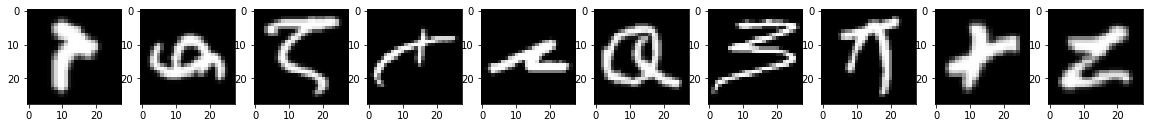

In [8]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X_all[i].reshape([28, 28]),cmap=plt.get_cmap('gray'))

In [9]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image.reshape([28 * 28])
X_all = np.apply_along_axis(rotate, 1, X_all)

In [10]:
X_all = 255 - X_all
X_all = X_all.astype('float32')
X_all /= 255.0

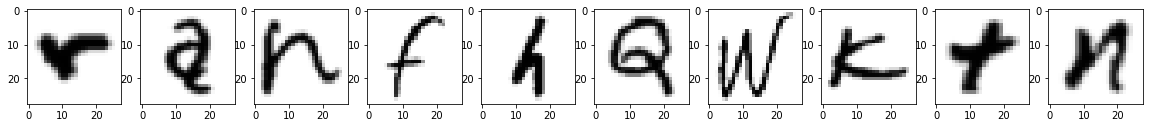

In [11]:
fig, ax = plt.subplots(1, 10, figsize=(20, 6))
for i in range(10):
    ax[i].imshow(X_all[i].reshape([28, 28]),cmap=plt.get_cmap('gray'))